In [54]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
stimuli_ids = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"] 
frequencies = [32.5, 34.0, 31.5, 35.5, 34.5, 30.0, 33.5, 30.5, 32.0, 35.0, 31.0, 33.0]

frequency_label = dict(zip(frequencies, stimuli_ids))

frequency_label

{32.5: '0',
 34.0: '1',
 31.5: '2',
 35.5: '3',
 34.5: '4',
 30.0: '5',
 33.5: '6',
 30.5: '7',
 32.0: '8',
 35.0: '9',
 31.0: '10',
 33.0: '11'}

In [56]:
def prepare_csv(path, root = "./data/", delay=0):
    df = pd.read_csv(root + path, header = None, names=["label", "timestamp"])
    df = df[df["label"].isin(stimuli_ids )] #+ ["start", "restingCE"])]
    df["datetime"] =  pd.to_datetime(df["timestamp"], format="%Y%m%d%H%M%S%f")
    df["seconds"] = (df["datetime"] - df.iloc[0]["datetime"]).dt.total_seconds() - delay

    duration = [stimuli_time]*df.shape[0]
    #duration[0] = 2 # start 
    #duration[1] = 30 # resting state
    df["duration"] = duration

    return df

In [90]:
df_subjectinfo = pd.read_csv("./Data/subjectinfo.csv")
df_subjectinfo

,date,task,subject,name,experiment,description,filename
0,20241120_19-34-52,Netflix,S1,yugyeong,Feedback,8step_2shover,20241120_19-34-52_yugyong_diff_feedback_8step_...
1,20241120_19-54-35,Netflix,S1,yugyeong,NonFeedback,8step_2shover,20241120_19-54-35_yugyeong_diff_nofeedback_8st...
2,20241122_15-07-50,Netflix,S2,namgi,Feedback,8step_2shover,20241122_15-07-50_namgi_diff_feedback_8step_2s...
3,20241122_15-34-35,Netflix,S2,namgi,NonFeedback,8step_2shover,20241122_15-34-35_namgi_diff_nofeedback_8step_...
4,20241127_17-00-00,Netflix,S3,jiyoon,Feedback,8step_2shover,20241127_17-00-00_jiyun_diff_feedback_8step_2s...
5,20241127_17-32-32,Netflix,S3,jiyoon,NonFeedback,8step_2shover,20241127_17-32-32_jiyun_diff_Nofeedback_8step_...
6,20241128_13-59-51,Netflix,S4,sasi,NonFeedback,8step_2shover,20241128_13-59-51_sasi_diff_nofeedback_8step_2...
7,20241128_14-19-26,Netflix,S4,sasi,Feedback,8step_2shover,20241128_14-19-26_sasi_diff_feedback_8step_2sh...
8,20241202_10-34-32,Netflix,S5,jimmy,Feedback,8step_2shover,20241120_12-05-32_jim_diff_feedback_8step_2sho...
9,20241202_10-55-28,Netflix,S5,jimmy,NonFeedback,8step_2shover,20241120_11-22-05_jim_diff_nofeedback_8step_1s...


In [91]:
combined_df = pd.DataFrame()

for index, row in df_subjectinfo.iterrows():
    df = pd.read_csv( "./Data/" +row["filename"], header = None, 
                 names=["label", "timestamp", "fstimuli", "finput", "TP", "TP_timestamp"]) 

    df["stimulilabel"] = df["fstimuli"].map(frequency_label)
    df["inputlabel"] = df["finput"].map(frequency_label)

    df = df[ ~df["label"].isin(["start","restingCE", "relax"])]

    df["datetime"] =  pd.to_datetime(df["timestamp"], format="%Y%m%d%H%M%S%f")
    df["seconds"] = (df["datetime"] - df.iloc[0]["datetime"]).dt.total_seconds()

    df["experiment"] = row["experiment"]
    df["name"] = row["name"]
    df["task"] = row["task"]
    df["subject"] = row["subject"]

    
    combined_df = pd.concat([df,combined_df])
combined_df

,label,timestamp,fstimuli,finput,TP,TP_timestamp,stimulilabel,inputlabel,datetime,seconds,experiment,name,task,subject
3,start_7,202412021636309376,30.5,30.5,1.0,2.024120e+17,7,7,2024-12-02 16:36:30.937600,0.0000,NonFeedback,jiyoon,ASCII,S3
5,start_1,202412021638000032,34.0,34.0,1.0,2.024120e+17,1,1,2024-12-02 16:38:00.003200,89.0656,NonFeedback,jiyoon,ASCII,S3
7,start_5,202412021639032532,30.0,30.0,1.0,2.024120e+17,5,5,2024-12-02 16:39:03.253200,152.3156,NonFeedback,jiyoon,ASCII,S3
9,start_2,202412021639463775,31.5,31.5,1.0,2.024120e+17,2,2,2024-12-02 16:39:46.377500,195.4399,NonFeedback,jiyoon,ASCII,S3
11,start_8,202412021640371419,32.0,35.5,1.0,2.024120e+17,8,3,2024-12-02 16:40:37.141900,246.2043,NonFeedback,jiyoon,ASCII,S3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,start_11,202411201947433339,33.0,33.0,1.0,2.024112e+17,11,11,2024-11-20 19:47:43.333900,755.5430,Feedback,yugyeong,Netflix,S1
67,start_1,202411201948043057,34.0,34.0,1.0,2.024112e+17,1,1,2024-11-20 19:48:04.305700,776.5148,Feedback,yugyeong,Netflix,S1
69,start_4,202411201948248324,34.5,34.5,1.0,2.024112e+17,4,4,2024-11-20 19:48:24.832400,797.0415,Feedback,yugyeong,Netflix,S1
71,start_7,202411201948543798,30.5,30.5,1.0,2.024112e+17,7,7,2024-11-20 19:48:54.379800,826.5889,Feedback,yugyeong,Netflix,S1


In [92]:
combined_df.groupby(["subject", "experiment", "task"])["TP"].mean().reset_index(name ='Accuracy')

,subject,experiment,task,Accuracy
0,S1,Feedback,ASCII,0.861111
1,S1,Feedback,Netflix,0.972222
2,S1,NonFeedback,ASCII,0.888889
3,S1,NonFeedback,Netflix,0.972222
4,S2,Feedback,ASCII,0.891892
5,S2,Feedback,Netflix,0.888889
6,S2,NonFeedback,ASCII,0.916667
7,S2,NonFeedback,Netflix,0.972222
8,S3,Feedback,ASCII,0.916667
9,S3,Feedback,Netflix,0.916667


In [93]:
pd.DataFrame(combined_df.groupby(["subject", "experiment", "task"])["TP"].mean()*100)

TP
subject experiment  task               
S1      Feedback    ASCII     86.111111
                    Netflix   97.222222
        NonFeedback ASCII     88.888889
                    Netflix   97.222222
S2      Feedback    ASCII     89.189189
                    Netflix   88.888889
        NonFeedback ASCII     91.666667
                    Netflix   97.222222
S3      Feedback    ASCII     91.666667
                    Netflix   91.666667
        NonFeedback ASCII     71.428571
                    Netflix   66.666667
S4      Feedback    ASCII     94.444444
                    Netflix   94.444444
        NonFeedback ASCII     63.888889
                    Netflix   91.666667
S5      Feedback    ASCII    100.000000
                    Netflix  100.000000
        NonFeedback ASCII     61.111111
                    Netflix   83.870968

In [94]:
pd.DataFrame(combined_df.groupby(["experiment"])["TP"].mean()*100)

,TP
experiment,
Feedback,93.766234
NonFeedback,82.037534


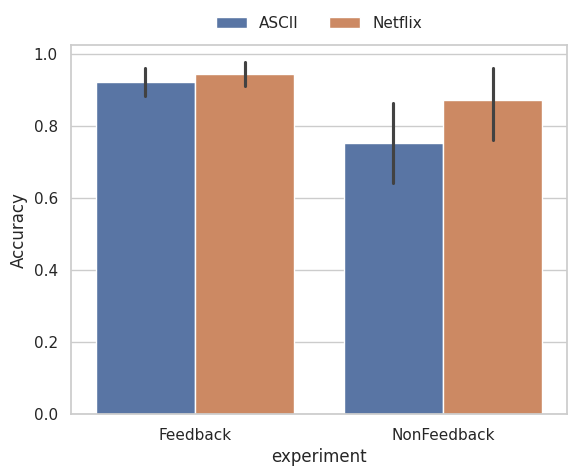

In [95]:
sns.set(style="whitegrid")

ax = sns.barplot(combined_df.groupby(["subject", "task", "experiment"])["TP"].mean().reset_index(name ='Accuracy'),x="experiment", y="Accuracy", hue="task")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)


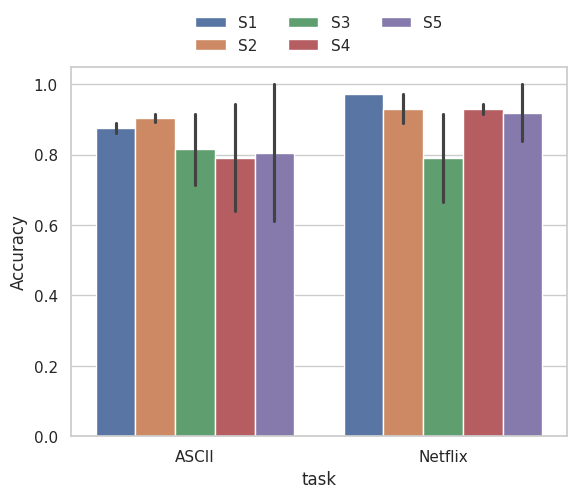

In [104]:

ax = sns.barplot(combined_df.groupby(["subject", "task", "experiment"])["TP"].mean().reset_index(name ='Accuracy'),x="task", y="Accuracy", hue="subject")

sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

/tmp/ipykernel_756317/2082676295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(kind='bar', data=combined_df.groupby(["subject", "task", "experiment"])["TP"].mean().reset_index(name ='Accuracy'),


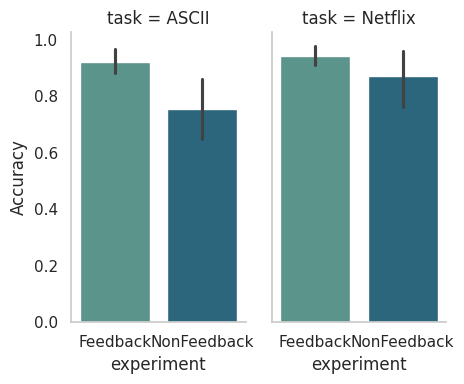

In [199]:
sns.color_palette("crest", as_cmap=True)
sns.set_theme(rc={'figure.figsize':(3.7,3.27)})
sns.set_style("whitegrid", {'axes.grid' : False})


g = sns.catplot(kind='bar', data=combined_df.groupby(["subject", "task", "experiment"])["TP"].mean().reset_index(name ='Accuracy'),
                 x='experiment', y='Accuracy', col='task',orient='x', palette="crest", legend=False,
                  height=4, aspect=.6, )

#sns.move_legend(ax, "lower right", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

In [172]:
combined_df.groupby(["name", "experiment"])["TP"].mean().reset_index(name ='Total Amount')

,name,experiment,Total Amount
0,jimmy,Feedback,1.000000
1,jimmy,NonFeedback,0.755102
2,jiyoon,Feedback,0.916667
3,jiyoon,NonFeedback,0.694915
4,namgi,Feedback,0.890411
5,namgi,NonFeedback,0.944444
6,sasi,Feedback,0.944444
7,sasi,NonFeedback,0.777778
8,yugyeong,Feedback,0.916667
9,yugyeong,NonFeedback,0.930556


In [371]:
(combined_df[combined_df["name"] == "sasi"]["stimulilabel"] == combined_df[combined_df["name"] == "sasi"]["inputlabel"]).sum()/72

0.7638888888888888

<Axes: >

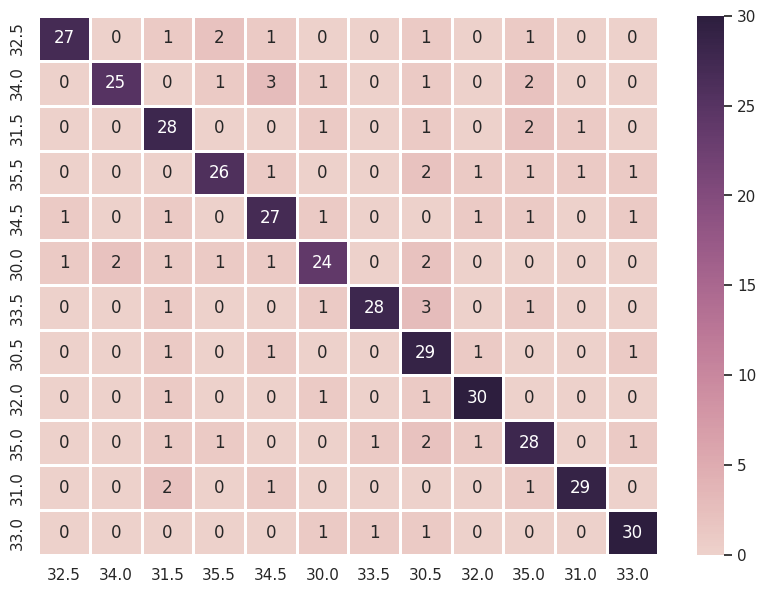

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cf_matrix = confusion_matrix(combined_df["stimulilabel"],combined_df["inputlabel"])

fig, ax = plt.subplots(figsize=(10,7)) 

sns.heatmap(cf_matrix, linewidths=1, xticklabels= frequencies, yticklabels = frequencies, annot=True, ax=ax, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))
